In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [40]:
boston = load_boston()

In [44]:
data = boston.data
feature_names = boston.feature_names

In [46]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [47]:
price = boston.target

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)

In [52]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)

In [53]:
X_test_sc = scaler.transform(X_train_sc)

In [54]:
X_train_sc = pd.DataFrame(X_train_sc, columns = feature_names)
X_test_sc = pd.DataFrame(X_test_sc, columns = feature_names)

In [56]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [57]:
X_train_tsne = tsne.fit_transform(X_train_sc)

In [58]:
X_train_tsne

array([[ 28.13809   ,  18.375324  ],
       [ -9.785578  ,  -4.5355387 ],
       [-15.695753  , -17.543627  ],
       [ 37.924854  ,  13.517046  ],
       [ -8.786393  ,   3.9951665 ],
       [-13.988173  ,  -7.7626657 ],
       [-11.960751  ,  -7.4771976 ],
       [-18.704308  , -23.812914  ],
       [ 38.665813  ,  12.55771   ],
       [ 35.53426   ,  11.327715  ],
       [-12.056245  ,  -8.116859  ],
       [ -5.7400675 ,  -5.8184624 ],
       [ -2.0275154 ,  -8.284211  ],
       [ 35.76188   ,  12.485169  ],
       [ -2.2966845 , -10.11944   ],
       [-10.227566  ,   7.138571  ],
       [ -7.261146  ,   1.1323055 ],
       [-14.401978  , -18.217144  ],
       [-13.338248  , -12.094605  ],
       [-17.165924  , -12.843067  ],
       [ 34.02783   ,  17.060034  ],
       [ -4.4231987 ,   0.22272195],
       [-15.497815  ,  -7.9093003 ],
       [-10.733389  ,  -5.5205164 ],
       [-18.339699  , -23.839216  ],
       [ -3.087924  ,  -8.492775  ],
       [  8.2998    ,   2.3935862 ],
 

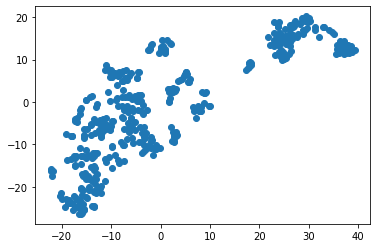

In [59]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])

In [73]:
kmeans = KMeans(n_clusters=3,max_iter=100, random_state=42)

In [74]:
lables_train = kmeans.fit_predict(X_train_sc)

In [75]:
pd.value_counts(lables_train)

0    191
1    127
2     86
dtype: int64

In [76]:
labels_test = kmeans.predict(X_test_sc)

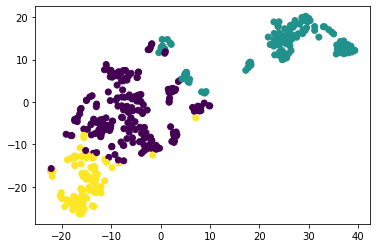

In [77]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=lables_train)

In [79]:
X_train.loc[lables_train==0, 'CRIM'].mean()

0.42166020942408367

In [80]:
X_train.loc[lables_train==1, 'CRIM'].mean()

10.797028425196853